In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="font-family:Times New Roman;font-size:30px;"> <center>📚 Reccurent Neural Netrowk.  A Beginner's Guide</center> </h1>
<p><center style="color:#159364; font-family:cursive;font-size:20px">“The purpose of learning is growth, and our minds, unlike our bodies, can continue growing as we continue to live.” — Mortimer Adler</center></p>


<h1   style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Introduction </h1>
           

<span style="font-family:Times New Roman; font-size:18px;">In this notebook we are going to learn about Recuurent Neural network. We will look at the notion and some types of RNN. You will also learn how to implement the RNN on the actual data set using  keras frame work </span>


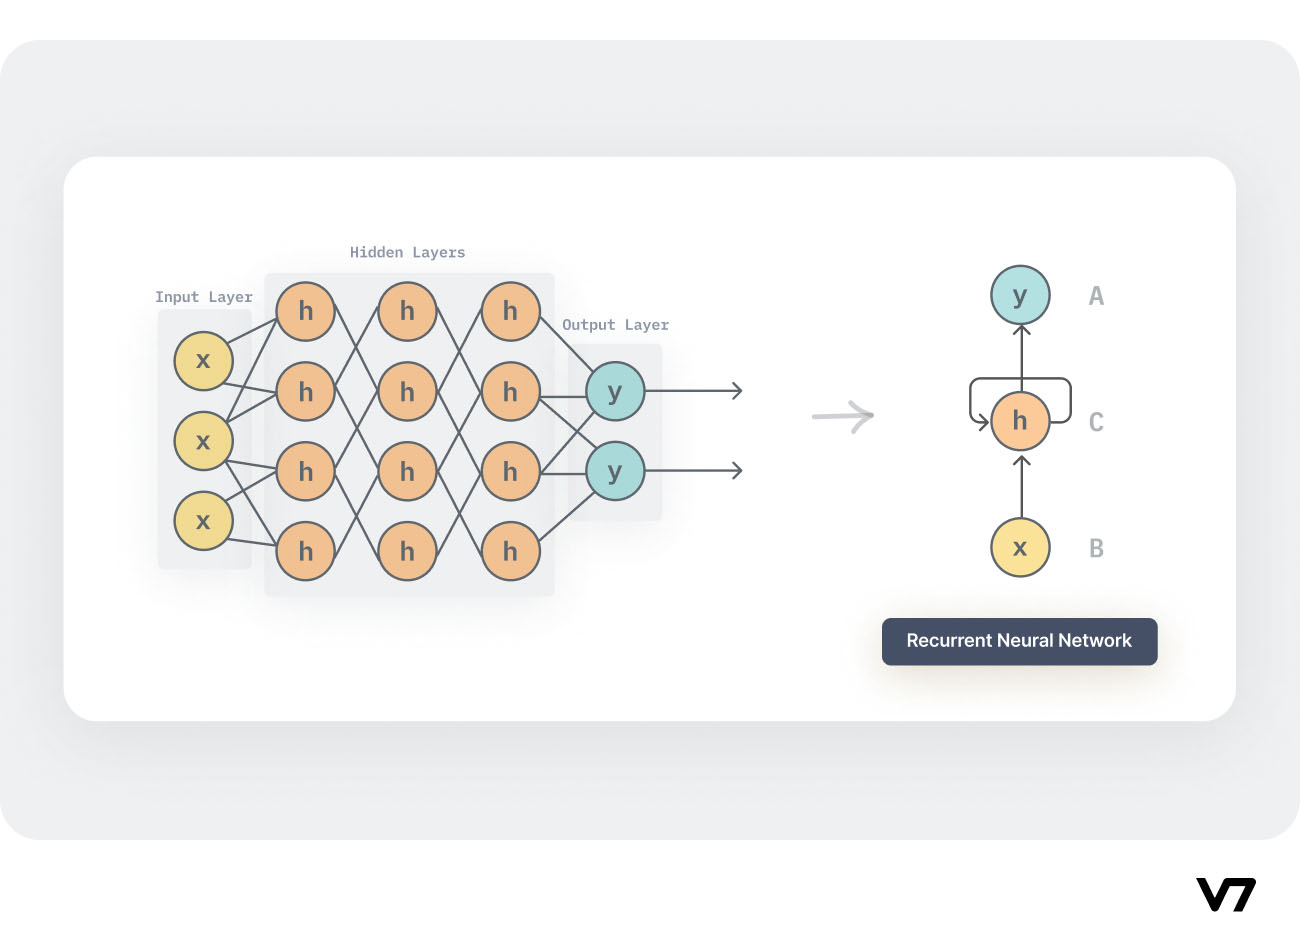

<h3   style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> What is RNN?? </h3>
           
<span style="font-family:Times New Roman; font-size:18px;">There are different types of Neural Network architectures. One of the is reccurent neural networks. It turns out that some of the architecture do best with explicity types of data. Convolutional Neuraral Netorwks performs well with the Images and similarly RNN performs well with the sequence data. </span>


<span style="font-family:Times New Roman; font-size:18px;"> Sequence Models like RNN and LSTMs have greatly transformed learning on sequences in the past few years. </span>




<span style="font-family:Times New Roman; font-size:18px;"> Examples of sequence data in applications. Speech recognition (sequence to sequence): in this example X = wave sequence, Y =text sequence </span>

<span style="font-family:Times New Roman; font-size:18px;">  Music generation (one to sequence):: in this example X= nothing or an integer, Y = wave sequence</span>

<span style="font-family:Times New Roman; font-size:18px;">  Sentiment classification (sequence to one): in this example X= text sequence, Y =  integer rating from one to five</span>


<span style="font-family:Times New Roman; font-size:18px;"> Machine translation (sequence to sequence): in this example X= text sequence (in one language), Y =  text sequence (in other language)</span>









<h5   style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Why use RNN??</h5>
           
           
           
 <span style="font-family:Times New Roman; font-size:18px;">
    
    Why not to use a standard network for sequence tasks? There are two problems:
    
1  = Inputs, outputs can be different lengths in different examples.
2 = This can be solved for normal NNs by paddings with the maximum lengths but it's not a good solution
    
 
Doesn't share features learned across different positions of text/sequence.
    
 Using a feature sharing like in CNNs can significantly reduce the number of parameters in your model. That's what we will do in RNNs.
</span>

![](https://user-images.githubusercontent.com/36159918/207071962-c2ae7150-3605-4aa4-a48b-0a79d4ce0a48.png)

<h1   style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Diffferent Types of Reccurent Neural Network </h1>
           
  
  

<span style="font-family:Times New Roman; font-size:18px;">Mainly there are four type of architectures 0f RNNs. </span>
<span style="font-family:Times New Roman; font-size:18px;"> One to One, One to Many, Many to One, Many to many </span>

![](https://user-images.githubusercontent.com/36159918/207073257-eca2153f-b781-49a7-be78-0070b60fe244.png)
           
           


**Many To One**


<span style="font-family:Times New Roman; font-size:18px;">In sentiment analysis problem, X is a text while Y is an integer that rangers from 1 to 5. The RNN architecture for that is Many to One as in Andrej Karpathy image. </span>


![](https://user-images.githubusercontent.com/36159918/207073416-2f049547-7e06-43eb-80df-9f755c58bcc3.png)

**One To Many**


<span style="font-family:Times New Roman; font-size:18px;">A One to Many architecture application would be music generation. </span>

![](https://user-images.githubusercontent.com/36159918/207073495-43174ed7-d830-4683-a4ed-0278c6cf53b0.png)


<span style="font-family:Times New Roman; font-size:18px;">Note that starting the second layer we are feeding the generated output back to the network. </span>

**Many To Many**


<span style="font-family:Times New Roman; font-size:18px;"> Applications like machine translation inputs and outputs sequences have different lengths in most of the cases. So an alternative Many To Many architecture that fits the translation would be as follows. </span>

![](https://user-images.githubusercontent.com/36159918/207073783-ea80cb8b-7073-49c7-9c90-445aec5378c7.png)


<span style="font-family:Times New Roman; font-size:18px;"> There are an encoder and a decoder parts in this architecture. The encoder encodes the input sequence into one matrix and feed it to the decoder to generate the outputs. Encoder and decoder have different weight matrices. </span>


**Summary of RNN types:**

![](https://user-images.githubusercontent.com/36159918/207073954-77ef6c7b-9c9c-4a16-9aa4-36913c98c23c.png)




For Heading
<h1  id="2" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 2 Importing some Libraries </h1>


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

In [ ]:
data = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt")

In [ ]:
data.head()

In [ ]:
print("Data Shape -->", data.shape)

In [ ]:
data.describe()

In [ ]:
print("Do you have a null column? \n", data.isna().sum())

For Heading
<h1  id="2" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 3 Data Preprocessing </h1>


**Split The data Into Train and Test**

In [ ]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [ ]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

For Heading
<h1  id="4" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 4 Normalizing The Data </h1>
           
     
<span style="font-family:Times New Roman; font-size:18px;"> Normailization is very important concept in deep learning.
The more you normailize the data it would be easier  for the model to make the prediction
The prediction will be more accurately by normailizing the data.
</span>

<span style="font-family:Times New Roman; font-size:18px;"> We are using Open Feature to normailize this data by using Min MaxScaler
</span>


In [ ]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

**Spilit The data in X_Train , Y train**


<span style="font-family:Times New Roman; font-size:18px;">Normalize the data into X_train and Y train </span>

<span style="font-family:Times New Roman; font-size:18px;">Fix the steps with the value of 40 </span>

In [ ]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

<h1  id="5" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Rehsape The Data </h1>
           


<span style="font-family:Times New Roman; font-size:18px;">One of the most basic points to be considered in RNNs is that they want their input to have 3 dimensions. </span>

<span style="font-family:Times New Roman; font-size:18px;"> Shape is typically depend on these three </span>

<span style="font-family:Times New Roman; font-size:18px;">1 the size of data we have </span>


<span style="font-family:Times New Roman; font-size:18px;">2 Number of Steps </span>


<span style="font-family:Times New Roman; font-size:18px;">3 Number of Feature's  </span>

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

<h1  id="6" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 6 Making The Model </h1>
           
           

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


<span style="font-family:Times New Roman; font-size:18px;">using Simple RNN more details can be found [Here](https://keras.io/api/layers/recurrent_layers/simple_rnn/) </span>


<span style="font-family:Times New Roman; font-size:18px;">We are using tanh activation function  </span>

In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

**Complie The Model**


<span style="font-family:Times New Roman; font-size:18px;">**Optimizer** The task of the opimitezer is to  update the parameters </span>


<span style="font-family:Times New Roman; font-size:18px;">**Loss** it shows to the model that whats the difference between the actual thing and the predicting thing. </span>

In [ ]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
epochs = 100 
batch_size = 20


<span style="font-family:Times New Roman; font-size:18px;">**Epoch: ** One epoch is the forward pass and backward pass of the training data.  </span>


<span style="font-family:Times New Roman; font-size:18px;">**Batch Size** we cannot pass the whole training data in one go we send the data in  some amount. </span>

In [ ]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

<h1  id="7" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Prediction </h1>

In [ ]:
test.head()

In [ ]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

In [ ]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)


<span style="font-family:Times New Roman; font-size:18px;">Since we use the "Open"feature while training we will use the same feature for our testing purpose </span>

In [ ]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)


<span style="font-family:Times New Roman; font-size:18px;">We geanrated the test data on the parameters of timestep which is 40. So we can make our prediction </span>

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)


<span style="font-family:Times New Roman; font-size:18px;">Before prediction. we goint to inverse the data into back its orignal form because we normailzie the data before training </span>


<h1  id="8" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  Evalutae The model </h1>
           
           
   
<span style="font-family:Times New Roman; font-size:18px;">We are going to compare the result and see what was the actual result and what  this model has predicted </span>


In [ ]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()


<span style="font-family:Times New Roman; font-size:18px;">Next we going to imlpement LSTM and GRU and see comapre all the results </span>

<h1  id="9" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Vanishing Gradient With RNNS </h1>
           
 


<span style="font-family:Times New Roman; font-size:18px;">One of the problems with naive RNNs that they run into vanishing gradient problem.An RNN that process a sequence data with the size of 10,000 time steps, has 10,000 deep layers which is very hard to optimize. </span>          




<span style="font-family:Times New Roman; font-size:18px;">  Let's take an example. Suppose we are working with language modeling problem and there are two sequences that model tries to learn: </span>




<span style="font-family:Times New Roman; font-size:18px;"> **Example 1**"The cat, which already ate ..., was full" and the second **Example 2** : "The cats, which already ate ..., were full" </span>





<span style="font-family:Times New Roman; font-size:18px;">  The dots represents here  many words in a sentence or sequence. What we need to learn here that "was" came with "cat" and that "were" came with "cats". The naive RNN is not very good at capturing very long-term dependencies like this. </span>




<span style="font-family:Times New Roman; font-size:18px;">As we have discussed in Deep neural networks, deeper networks are getting into the vanishing gradient problem. That also happens with RNNs with a long sequence size. </span>

![](https://user-images.githubusercontent.com/36159918/207290787-9e2014bf-529c-4f4e-9971-ff770027a933.png)






<span style="font-family:Times New Roman; font-size:18px;">For computing the word "was", we need to compute the gradient for everything behind. Multiplying fractions tends to vanish the gradient, while multiplication of large number tends to explode it.  Therefore some of your weights may not be updated properly.</span>






<span style="font-family:Times New Roman; font-size:18px;"> In the problem we descried it means that its hard for the network to memorize "was" word all over back to "cat". So in this case, the network won't identify the singular/plural words so that it gives it the right grammar form of verb was/were. </span>





<span style="font-family:Times New Roman; font-size:18px;"> The conclusion is that RNNs aren't good in long-term dependencies </span>





<span style="font-family:Times New Roman; font-size:18px;">In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them. http://colah.github.io/posts/2015-08-Understanding-LSTMs/ </span>





<span style="font-family:Times New Roman; font-size:18px;"> Vanishing gradients problem tends to be the bigger problem with RNNs than the exploding gradients problem. </span>





<span style="font-family:Times New Roman; font-size:18px;"> Exploding gradients can be easily seen when your weight values become NaN . So one of the ways solve exploding gradient is to apply gradient clipping means if your gradient is more than some threshold - re-scale some of your gradient vector so that is not too big. So there are cliped according to some maximum value.</span>



![](https://user-images.githubusercontent.com/36159918/207294505-a32cf077-0588-4011-9bb7-208923626eac.png)




<span style="font-family:Times New Roman; font-size:18px;"> Solutions for the Exploding gradient problem:
  - 1  Truncated backpropagation which means Not to update all the weights in the way back. This is not a optimal solution
  - 2 Gradient clipping.</span>




<span style="font-family:Times New Roman; font-size:18px;">Solution for the Vanishing gradient problem  
    - 1 - Weight initialization >> Like Like He           initialization

    - 2 = Use LSTM/GRU networks.</span>
           

<h1  id="10" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Gated Recurrent Unit (GRU) </h1>
           
   <span style="font-family:Times New Roman; font-size:18px;">GRU is an RNN type that can help solve the vanishing gradient problem and can remember the long-term dependencies </span>
   
   
   <span style="font-family:Times New Roman; font-size:18px;">The basic RNN unit can be visualized to be like this:. </span>
   
   ![](https://user-images.githubusercontent.com/36159918/207298852-facfc7ad-6308-41f9-a6a7-2017ab6fbd7a.png)


<span style="font-family:Times New Roman; font-size:18px;">We will represent the GRU with a similar drawings. Each layer in GRUs has a new variable C which is the memory cell. It can tell to whether memorize something or not. Equations of the GRUs: </span>

![](https://user-images.githubusercontent.com/36159918/207299070-0dd0a3fe-e117-40f8-8127-781ca0b3c564.png)


<span style="font-family:Times New Roman; font-size:18px;">The update gate is between 0 and 1.To understand GRUs imagine that the update gate is either 0 or 1 most of the time.So we update the memory cell based on the update cell and the previous cell
 </span>


<span style="font-family:Times New Roman; font-size:18px;">Lets take the cat sentence example and apply it to understand this equations
- Sentence: "The cat, which already ate ........................, was full"
- We will suppose that U is 0 or 1 and is a bit that tells us if a singular word needs to be memorized
- Splitting the words and get values of C and U at each place
</span>

![](https://user-images.githubusercontent.com/36159918/207300075-ad401a1d-ce24-4326-a80f-b79f12d7dd8f.PNG)


<span style="font-family:Times New Roman; font-size:18px;">Drawing for the GRUs </span>

![](https://user-images.githubusercontent.com/36159918/207300201-59defaed-9c18-49dc-9464-cae30bbad6cb.png)


<span style="font-family:Times New Roman; font-size:18px;">Drawings like in http://colah.github.io/posts/2015-08-Understanding-LSTMs/ is so popular and makes it easier to understand GRUs and LSTMs. But Andrew Ng finds it's better to look at the equations. </span>


<span style="font-family:Times New Roman; font-size:18px;">Because the update gate U is usually a small number like 0.00001, GRUs doesn't suffer the vanishing gradient problem.

</span>





<h1  id="11" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> LSTM</h1>



<span style="font-family:Times New Roman; font-size:18px;">LSTM - the other type of RNN that can enable you to account for long-term dependencies. It's more powerful and general than GRU. </span>


<span style="font-family:Times New Roman; font-size:18px;">Here are the equations of an LSTM unit: </span>

![](https://user-images.githubusercontent.com/36159918/207307033-85b90cf1-4e85-4902-b1ee-54d327b542e7.png)

<span style="font-family:Times New Roman; font-size:18px;">In GRU we have an update gate U , a relevance gate r , and a candidate cell variables C while in LSTM we have an update gate U (sometimes it's called input gate I), a forget gate F , an output gate O , and a candidate cell variables C. </span>

![](https://user-images.githubusercontent.com/36159918/207307189-bb402d06-5fc6-469b-8b69-f67992840dc6.png)

<span style="font-family:Times New Roman; font-size:18px;">Some variants on LSTM includes:

- LSTM with peephole connections.
-  The normal LSTM with C included with every gate.
</span>


<span style="font-family:Times New Roman; font-size:18px;">here isn't a universal superior between LSTM and it's variants. One of the advantages of GRU is that it's simpler and can be used to build much bigger network but the LSTM is more powerful and general. </span>

<h1  id="12" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> LSTM Model </h1>



In [ ]:
from keras.layers import LSTM

In [ ]:
regressor_l = Sequential()

regressor_l.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor_l.add(Dropout(0.2))

regressor_l.add(LSTM(units = 50, return_sequences = True))
regressor_l.add(Dropout(0.2))

regressor_l.add(LSTM(units = 50, return_sequences = True))
regressor_l.add(Dropout(0.2))

regressor_l.add(LSTM(units = 50))
regressor_l.add(Dropout(0.2))

regressor_l.add(Dense(units = 1))

<h1  id="13" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Compile  Model</h1>



In [ ]:
regressor_l.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
regressor_l.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

<h1  id="14" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
       letter-spacing:0.5px"> Predict The LSTM</h1>
       
       
       
   



In [ ]:
predict_l = regressor_l.predict(X_test)
predict_l = scaler.inverse_transform(predict_l)

In [ ]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict_l, color = "blue", label = "Predict Stock Price LSTM")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

<h1  id="17" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Comparison </h1>



In [ ]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "green", label = "Predict Stock Price Simple RNN")
plt.plot(predict_l, color = "blue", label = "Predict Stock Price LSTM")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

<span style="font-family:Times New Roman; font-size:18px;"> As you can see by giving the same parameters currently it shows that they are almost same but if we  expand a litle bit more our lSTM Model we can see that the model will improve. Since we are doing  comparitive anylsis we had to make the parameters same.</span>
